In [2]:
!pip install tensorflow 
!pip install tensorflow-gpu 
!pip install opencv-python 
!pip install mediapipe 
!pip install sklearn 
!pip install matplotlib

DEPRECATION: Loading egg at /opt/homebrew/anaconda3/lib/python3.11/site-packages/face_alignment-1.4.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /opt/homebrew/anaconda3/lib/python3.11/site-packages/face_alignment-1.4.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "/opt/homebrew/anaconda3/lib/python3.11/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

DEPRECATION: Loading egg at /opt/homebrew/anaconda3/lib/python3.11/site-packages/face_alignment-1.4.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /opt/homebrew/anaconda3/lib/python3.11/site-packages/face_alignment-1.4.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /opt/homebrew/anaconda3/lib/python3.11/site-packages/face_alignment-1.4.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scik

In [144]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [149]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

I0000 00:00:1708589608.484655       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [150]:
draw_landmarks(frame, results)

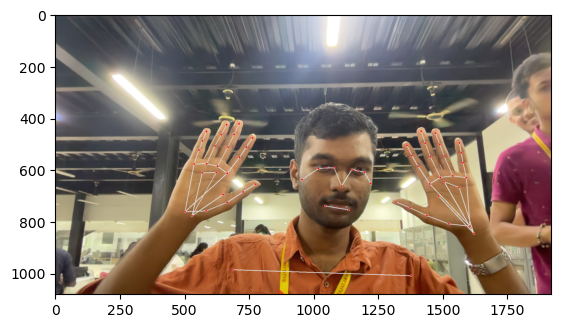

In [151]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [152]:
len(results.left_hand_landmarks.landmark)

21

In [153]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [154]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [155]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [156]:
result_test = extract_keypoints(results)

In [157]:
result_test

array([ 5.77730775e-01,  6.14192963e-01, -5.83845377e-01,  9.99997437e-01,
        5.98764539e-01,  5.55337429e-01, -5.20082593e-01,  9.99993980e-01,
        6.10804737e-01,  5.59756458e-01, -5.19362032e-01,  9.99993086e-01,
        6.23871386e-01,  5.65069854e-01, -5.18842459e-01,  9.99993026e-01,
        5.62627077e-01,  5.49528301e-01, -5.11940539e-01,  9.99994457e-01,
        5.46522141e-01,  5.49908817e-01, -5.11241555e-01,  9.99993205e-01,
        5.30731142e-01,  5.51988363e-01, -5.11136353e-01,  9.99994040e-01,
        6.36580765e-01,  6.04662061e-01, -2.24197954e-01,  9.99994576e-01,
        4.97979969e-01,  5.90833902e-01, -1.70396551e-01,  9.99997199e-01,
        5.91792643e-01,  6.99865699e-01, -4.83897835e-01,  9.99990225e-01,
        5.45043349e-01,  6.86081111e-01, -4.70113933e-01,  9.99994636e-01,
        7.17897117e-01,  9.35126603e-01, -8.67595002e-02,  9.99677479e-01,
        3.59217197e-01,  9.13297594e-01, -5.99095412e-02,  9.99675751e-01,
        9.47713673e-01,  

In [158]:
np.save('0', result_test)

In [159]:
np.load('0.npy')

array([ 5.77730775e-01,  6.14192963e-01, -5.83845377e-01,  9.99997437e-01,
        5.98764539e-01,  5.55337429e-01, -5.20082593e-01,  9.99993980e-01,
        6.10804737e-01,  5.59756458e-01, -5.19362032e-01,  9.99993086e-01,
        6.23871386e-01,  5.65069854e-01, -5.18842459e-01,  9.99993026e-01,
        5.62627077e-01,  5.49528301e-01, -5.11940539e-01,  9.99994457e-01,
        5.46522141e-01,  5.49908817e-01, -5.11241555e-01,  9.99993205e-01,
        5.30731142e-01,  5.51988363e-01, -5.11136353e-01,  9.99994040e-01,
        6.36580765e-01,  6.04662061e-01, -2.24197954e-01,  9.99994576e-01,
        4.97979969e-01,  5.90833902e-01, -1.70396551e-01,  9.99997199e-01,
        5.91792643e-01,  6.99865699e-01, -4.83897835e-01,  9.99990225e-01,
        5.45043349e-01,  6.86081111e-01, -4.70113933e-01,  9.99994636e-01,
        7.17897117e-01,  9.35126603e-01, -8.67595002e-02,  9.99677479e-01,
        3.59217197e-01,  9.13297594e-01, -5.99095412e-02,  9.99675751e-01,
        9.47713673e-01,  

In [160]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thankyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [161]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

In [162]:
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass
                    

In [163]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1708589646.559884       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [164]:
cap.release()
cv2.destroyAllWindows()

In [165]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [166]:
label_map = {label:num for num, label in enumerate(actions)}

In [167]:
label_map

{'hello': 0, 'thankyou': 1}

In [168]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [169]:
np.array(sequences).shape

(60, 30, 258)

In [170]:
np.array(labels).shape

(60,)

In [171]:
X = np.array(sequences)

In [172]:
X.shape

(60, 30, 258)

In [173]:
y = to_categorical(labels).astype(int)

In [174]:
y

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [176]:
y_test.shape

(3, 2)

In [177]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [178]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [179]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [180]:
res = [.7, 0.2, 0.1]

In [181]:
actions[np.argmax(res)]

'hello'

In [182]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [183]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
2/2 [==============================] - 2s 18ms/step - loss: 2.4105 - categorical_accuracy: 0.6842
Epoch 2/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.8077 - categorical_accuracy: 0.4912
Epoch 3/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.0825 - categorical_accuracy: 1.0000
Epoch 4/2000
2/2 [==============================] - 0s 25ms/step - loss: 2.0094 - categorical_accuracy: 0.8246
Epoch 5/2000
2/2 [==============================] - 0s 24ms/step - loss: 7.2641 - categorical_accuracy: 0.6316
Epoch 6/2000
2/2 [==============================] - 0s 24ms/step - loss: 4.7283 - categorical_accuracy: 0.5614
Epoch 7/2000
2/2 [==============================] - 0s 25ms/step - loss: 0.0233 - categorical_accuracy: 1.0000
Epoch 8/2000
2/2 [==============================] - 0s 25ms/step - loss: 0.5085 - categorical_accuracy: 0.8421
Epoch 9/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.3280 - categorical_accuracy: 0.9298
E

2/2 [==============================] - 0s 28ms/step - loss: 1.2924e-06 - categorical_accuracy: 1.0000
Epoch 73/2000
2/2 [==============================] - 0s 28ms/step - loss: 1.2694e-06 - categorical_accuracy: 1.0000
Epoch 74/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.2360e-06 - categorical_accuracy: 1.0000
Epoch 75/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.2276e-06 - categorical_accuracy: 1.0000
Epoch 76/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.2067e-06 - categorical_accuracy: 1.0000
Epoch 77/2000
2/2 [==============================] - 0s 27ms/step - loss: 1.1879e-06 - categorical_accuracy: 1.0000
Epoch 78/2000
2/2 [==============================] - 0s 28ms/step - loss: 1.1691e-06 - categorical_accuracy: 1.0000
Epoch 79/2000
2/2 [==============================] - 0s 29ms/step - loss: 1.1523e-06 - categorical_accuracy: 1.0000
Epoch 80/2000
2/2 [==============================] - 0s 29ms/step - loss: 1.1356e-06 -

2/2 [==============================] - 0s 27ms/step - loss: 5.2075e-07 - categorical_accuracy: 1.0000
Epoch 143/2000
2/2 [==============================] - 0s 29ms/step - loss: 5.1657e-07 - categorical_accuracy: 1.0000
Epoch 144/2000
2/2 [==============================] - 0s 28ms/step - loss: 5.0611e-07 - categorical_accuracy: 1.0000
Epoch 145/2000
2/2 [==============================] - 0s 26ms/step - loss: 5.0193e-07 - categorical_accuracy: 1.0000
Epoch 146/2000
2/2 [==============================] - 0s 26ms/step - loss: 4.9984e-07 - categorical_accuracy: 1.0000
Epoch 147/2000
2/2 [==============================] - 0s 29ms/step - loss: 4.9565e-07 - categorical_accuracy: 1.0000
Epoch 148/2000
2/2 [==============================] - 0s 28ms/step - loss: 4.8938e-07 - categorical_accuracy: 1.0000
Epoch 149/2000
2/2 [==============================] - 0s 28ms/step - loss: 4.8311e-07 - categorical_accuracy: 1.0000
Epoch 150/2000
2/2 [==============================] - 0s 27ms/step - loss: 4.78

2/2 [==============================] - 0s 26ms/step - loss: 2.7188e-07 - categorical_accuracy: 1.0000
Epoch 213/2000
2/2 [==============================] - 0s 28ms/step - loss: 2.6979e-07 - categorical_accuracy: 1.0000
Epoch 214/2000
2/2 [==============================] - 0s 28ms/step - loss: 2.6770e-07 - categorical_accuracy: 1.0000
Epoch 215/2000
2/2 [==============================] - 0s 25ms/step - loss: 2.6561e-07 - categorical_accuracy: 1.0000
Epoch 216/2000
2/2 [==============================] - 0s 26ms/step - loss: 2.6351e-07 - categorical_accuracy: 1.0000
Epoch 217/2000
2/2 [==============================] - 0s 27ms/step - loss: 2.6142e-07 - categorical_accuracy: 1.0000
Epoch 218/2000
2/2 [==============================] - 0s 26ms/step - loss: 2.6142e-07 - categorical_accuracy: 1.0000
Epoch 219/2000
2/2 [==============================] - 0s 25ms/step - loss: 2.5724e-07 - categorical_accuracy: 1.0000
Epoch 220/2000
2/2 [==============================] - 0s 26ms/step - loss: 2.55

2/2 [==============================] - 0s 26ms/step - loss: 1.6940e-07 - categorical_accuracy: 1.0000
Epoch 283/2000
2/2 [==============================] - 0s 27ms/step - loss: 1.6940e-07 - categorical_accuracy: 1.0000
Epoch 284/2000
2/2 [==============================] - 0s 27ms/step - loss: 1.6731e-07 - categorical_accuracy: 1.0000
Epoch 285/2000
2/2 [==============================] - 0s 27ms/step - loss: 1.6731e-07 - categorical_accuracy: 1.0000
Epoch 286/2000
2/2 [==============================] - 0s 28ms/step - loss: 1.6522e-07 - categorical_accuracy: 1.0000
Epoch 287/2000
2/2 [==============================] - 0s 27ms/step - loss: 1.6522e-07 - categorical_accuracy: 1.0000
Epoch 288/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.6313e-07 - categorical_accuracy: 1.0000
Epoch 289/2000
2/2 [==============================] - 0s 27ms/step - loss: 1.6313e-07 - categorical_accuracy: 1.0000
Epoch 290/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.63

2/2 [==============================] - 0s 27ms/step - loss: 1.1921e-07 - categorical_accuracy: 1.0000
Epoch 353/2000
2/2 [==============================] - 0s 27ms/step - loss: 1.1921e-07 - categorical_accuracy: 1.0000
Epoch 354/2000
2/2 [==============================] - 0s 25ms/step - loss: 1.1921e-07 - categorical_accuracy: 1.0000
Epoch 355/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.1712e-07 - categorical_accuracy: 1.0000
Epoch 356/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.1712e-07 - categorical_accuracy: 1.0000
Epoch 357/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.1712e-07 - categorical_accuracy: 1.0000
Epoch 358/2000
2/2 [==============================] - 0s 27ms/step - loss: 1.1712e-07 - categorical_accuracy: 1.0000
Epoch 359/2000
2/2 [==============================] - 0s 28ms/step - loss: 1.1503e-07 - categorical_accuracy: 1.0000
Epoch 360/2000
2/2 [==============================] - 0s 27ms/step - loss: 1.15

2/2 [==============================] - 0s 26ms/step - loss: 8.9930e-08 - categorical_accuracy: 1.0000
Epoch 423/2000
2/2 [==============================] - 0s 27ms/step - loss: 8.9930e-08 - categorical_accuracy: 1.0000
Epoch 424/2000
2/2 [==============================] - 0s 25ms/step - loss: 8.9930e-08 - categorical_accuracy: 1.0000
Epoch 425/2000
2/2 [==============================] - 0s 26ms/step - loss: 8.7838e-08 - categorical_accuracy: 1.0000
Epoch 426/2000
2/2 [==============================] - 0s 26ms/step - loss: 8.7838e-08 - categorical_accuracy: 1.0000
Epoch 427/2000
2/2 [==============================] - 0s 26ms/step - loss: 8.7838e-08 - categorical_accuracy: 1.0000
Epoch 428/2000
2/2 [==============================] - 0s 26ms/step - loss: 8.7838e-08 - categorical_accuracy: 1.0000
Epoch 429/2000
2/2 [==============================] - 0s 28ms/step - loss: 8.7838e-08 - categorical_accuracy: 1.0000
Epoch 430/2000
2/2 [==============================] - 0s 29ms/step - loss: 8.78

2/2 [==============================] - 0s 28ms/step - loss: 6.6924e-08 - categorical_accuracy: 1.0000
Epoch 493/2000
2/2 [==============================] - 0s 28ms/step - loss: 6.6924e-08 - categorical_accuracy: 1.0000
Epoch 494/2000
2/2 [==============================] - 0s 27ms/step - loss: 6.6924e-08 - categorical_accuracy: 1.0000
Epoch 495/2000
2/2 [==============================] - 0s 27ms/step - loss: 6.6924e-08 - categorical_accuracy: 1.0000
Epoch 496/2000
2/2 [==============================] - 0s 26ms/step - loss: 6.6924e-08 - categorical_accuracy: 1.0000
Epoch 497/2000
2/2 [==============================] - 0s 27ms/step - loss: 6.6924e-08 - categorical_accuracy: 1.0000
Epoch 498/2000
2/2 [==============================] - 0s 27ms/step - loss: 6.6924e-08 - categorical_accuracy: 1.0000
Epoch 499/2000
2/2 [==============================] - 0s 26ms/step - loss: 6.4833e-08 - categorical_accuracy: 1.0000
Epoch 500/2000
2/2 [==============================] - 0s 27ms/step - loss: 6.48

2/2 [==============================] - 0s 28ms/step - loss: 5.2285e-08 - categorical_accuracy: 1.0000
Epoch 563/2000
2/2 [==============================] - 0s 29ms/step - loss: 5.2285e-08 - categorical_accuracy: 1.0000
Epoch 564/2000
2/2 [==============================] - 0s 26ms/step - loss: 5.2285e-08 - categorical_accuracy: 1.0000
Epoch 565/2000
2/2 [==============================] - 0s 27ms/step - loss: 5.2285e-08 - categorical_accuracy: 1.0000
Epoch 566/2000
2/2 [==============================] - 0s 26ms/step - loss: 5.2285e-08 - categorical_accuracy: 1.0000
Epoch 567/2000
2/2 [==============================] - 0s 27ms/step - loss: 5.2285e-08 - categorical_accuracy: 1.0000
Epoch 568/2000
2/2 [==============================] - 0s 28ms/step - loss: 5.0193e-08 - categorical_accuracy: 1.0000
Epoch 569/2000
2/2 [==============================] - 0s 26ms/step - loss: 4.8102e-08 - categorical_accuracy: 1.0000
Epoch 570/2000
2/2 [==============================] - 0s 26ms/step - loss: 4.81

2/2 [==============================] - 0s 27ms/step - loss: 3.7645e-08 - categorical_accuracy: 1.0000
Epoch 633/2000
2/2 [==============================] - 0s 26ms/step - loss: 3.7645e-08 - categorical_accuracy: 1.0000
Epoch 634/2000
2/2 [==============================] - 0s 26ms/step - loss: 3.7645e-08 - categorical_accuracy: 1.0000
Epoch 635/2000
2/2 [==============================] - 0s 25ms/step - loss: 3.7645e-08 - categorical_accuracy: 1.0000
Epoch 636/2000
2/2 [==============================] - 0s 26ms/step - loss: 3.7645e-08 - categorical_accuracy: 1.0000
Epoch 637/2000
2/2 [==============================] - 0s 27ms/step - loss: 3.7645e-08 - categorical_accuracy: 1.0000
Epoch 638/2000
2/2 [==============================] - 0s 27ms/step - loss: 3.7645e-08 - categorical_accuracy: 1.0000
Epoch 639/2000
2/2 [==============================] - 0s 28ms/step - loss: 3.7645e-08 - categorical_accuracy: 1.0000
Epoch 640/2000
2/2 [==============================] - 0s 28ms/step - loss: 3.76

2/2 [==============================] - 0s 27ms/step - loss: 3.1371e-08 - categorical_accuracy: 1.0000
Epoch 703/2000
2/2 [==============================] - 0s 27ms/step - loss: 3.1371e-08 - categorical_accuracy: 1.0000
Epoch 704/2000
2/2 [==============================] - 0s 27ms/step - loss: 3.1371e-08 - categorical_accuracy: 1.0000
Epoch 705/2000
2/2 [==============================] - 0s 26ms/step - loss: 3.1371e-08 - categorical_accuracy: 1.0000
Epoch 706/2000
2/2 [==============================] - 0s 26ms/step - loss: 3.1371e-08 - categorical_accuracy: 1.0000
Epoch 707/2000
2/2 [==============================] - 0s 25ms/step - loss: 3.1371e-08 - categorical_accuracy: 1.0000
Epoch 708/2000
2/2 [==============================] - 0s 25ms/step - loss: 3.1371e-08 - categorical_accuracy: 1.0000
Epoch 709/2000
2/2 [==============================] - 0s 26ms/step - loss: 3.1371e-08 - categorical_accuracy: 1.0000
Epoch 710/2000
2/2 [==============================] - 0s 25ms/step - loss: 3.13

2/2 [==============================] - 0s 29ms/step - loss: 2.5097e-08 - categorical_accuracy: 1.0000
Epoch 773/2000
2/2 [==============================] - 0s 27ms/step - loss: 2.5097e-08 - categorical_accuracy: 1.0000
Epoch 774/2000
2/2 [==============================] - 0s 27ms/step - loss: 2.5097e-08 - categorical_accuracy: 1.0000
Epoch 775/2000
2/2 [==============================] - 0s 26ms/step - loss: 2.7188e-08 - categorical_accuracy: 1.0000
Epoch 776/2000
2/2 [==============================] - 0s 27ms/step - loss: 2.7188e-08 - categorical_accuracy: 1.0000
Epoch 777/2000
2/2 [==============================] - 0s 27ms/step - loss: 2.3005e-08 - categorical_accuracy: 1.0000
Epoch 778/2000
2/2 [==============================] - 0s 27ms/step - loss: 2.3005e-08 - categorical_accuracy: 1.0000
Epoch 779/2000
2/2 [==============================] - 0s 26ms/step - loss: 2.3005e-08 - categorical_accuracy: 1.0000
Epoch 780/2000
2/2 [==============================] - 0s 29ms/step - loss: 2.50

2/2 [==============================] - 0s 27ms/step - loss: 2.0914e-08 - categorical_accuracy: 1.0000
Epoch 843/2000
2/2 [==============================] - 0s 26ms/step - loss: 2.0914e-08 - categorical_accuracy: 1.0000
Epoch 844/2000
2/2 [==============================] - 0s 26ms/step - loss: 2.0914e-08 - categorical_accuracy: 1.0000
Epoch 845/2000
2/2 [==============================] - 0s 27ms/step - loss: 2.0914e-08 - categorical_accuracy: 1.0000
Epoch 846/2000
2/2 [==============================] - 0s 26ms/step - loss: 2.3005e-08 - categorical_accuracy: 1.0000
Epoch 847/2000
2/2 [==============================] - 0s 26ms/step - loss: 2.3005e-08 - categorical_accuracy: 1.0000
Epoch 848/2000
2/2 [==============================] - 0s 26ms/step - loss: 2.3005e-08 - categorical_accuracy: 1.0000
Epoch 849/2000
2/2 [==============================] - 0s 27ms/step - loss: 2.0914e-08 - categorical_accuracy: 1.0000
Epoch 850/2000
2/2 [==============================] - 0s 28ms/step - loss: 2.09

2/2 [==============================] - 0s 26ms/step - loss: 1.6731e-08 - categorical_accuracy: 1.0000
Epoch 913/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.6731e-08 - categorical_accuracy: 1.0000
Epoch 914/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.6731e-08 - categorical_accuracy: 1.0000
Epoch 915/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.6731e-08 - categorical_accuracy: 1.0000
Epoch 916/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.6731e-08 - categorical_accuracy: 1.0000
Epoch 917/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.6731e-08 - categorical_accuracy: 1.0000
Epoch 918/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.6731e-08 - categorical_accuracy: 1.0000
Epoch 919/2000
2/2 [==============================] - 0s 30ms/step - loss: 1.6731e-08 - categorical_accuracy: 1.0000
Epoch 920/2000
2/2 [==============================] - 0s 32ms/step - loss: 1.88

2/2 [==============================] - 0s 27ms/step - loss: 1.4640e-08 - categorical_accuracy: 1.0000
Epoch 983/2000
2/2 [==============================] - 0s 27ms/step - loss: 1.4640e-08 - categorical_accuracy: 1.0000
Epoch 984/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.4640e-08 - categorical_accuracy: 1.0000
Epoch 985/2000
2/2 [==============================] - 0s 42ms/step - loss: 1.4640e-08 - categorical_accuracy: 1.0000
Epoch 986/2000
2/2 [==============================] - 0s 29ms/step - loss: 1.4640e-08 - categorical_accuracy: 1.0000
Epoch 987/2000
2/2 [==============================] - 0s 28ms/step - loss: 1.4640e-08 - categorical_accuracy: 1.0000
Epoch 988/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.4640e-08 - categorical_accuracy: 1.0000
Epoch 989/2000
2/2 [==============================] - 0s 27ms/step - loss: 1.4640e-08 - categorical_accuracy: 1.0000
Epoch 990/2000
2/2 [==============================] - 0s 28ms/step - loss: 1.46

2/2 [==============================] - 0s 28ms/step - loss: 1.2548e-08 - categorical_accuracy: 1.0000
Epoch 1052/2000
2/2 [==============================] - 0s 27ms/step - loss: 1.2548e-08 - categorical_accuracy: 1.0000
Epoch 1053/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.2548e-08 - categorical_accuracy: 1.0000
Epoch 1054/2000
2/2 [==============================] - 0s 27ms/step - loss: 1.2548e-08 - categorical_accuracy: 1.0000
Epoch 1055/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.2548e-08 - categorical_accuracy: 1.0000
Epoch 1056/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.2548e-08 - categorical_accuracy: 1.0000
Epoch 1057/2000
2/2 [==============================] - 0s 27ms/step - loss: 1.2548e-08 - categorical_accuracy: 1.0000
Epoch 1058/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.2548e-08 - categorical_accuracy: 1.0000
Epoch 1059/2000
2/2 [==============================] - 0s 26ms/step - lo

2/2 [==============================] - 0s 27ms/step - loss: 1.2548e-08 - categorical_accuracy: 1.0000
Epoch 1121/2000
2/2 [==============================] - 0s 27ms/step - loss: 1.2548e-08 - categorical_accuracy: 1.0000
Epoch 1122/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.2548e-08 - categorical_accuracy: 1.0000
Epoch 1123/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.2548e-08 - categorical_accuracy: 1.0000
Epoch 1124/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.2548e-08 - categorical_accuracy: 1.0000
Epoch 1125/2000
2/2 [==============================] - 0s 28ms/step - loss: 1.2548e-08 - categorical_accuracy: 1.0000
Epoch 1126/2000
2/2 [==============================] - 0s 27ms/step - loss: 1.0457e-08 - categorical_accuracy: 1.0000
Epoch 1127/2000
2/2 [==============================] - 0s 28ms/step - loss: 1.0457e-08 - categorical_accuracy: 1.0000
Epoch 1128/2000
2/2 [==============================] - 0s 27ms/step - lo

2/2 [==============================] - 0s 26ms/step - loss: 1.0457e-08 - categorical_accuracy: 1.0000
Epoch 1190/2000
2/2 [==============================] - 0s 25ms/step - loss: 1.0457e-08 - categorical_accuracy: 1.0000
Epoch 1191/2000
2/2 [==============================] - 0s 27ms/step - loss: 1.0457e-08 - categorical_accuracy: 1.0000
Epoch 1192/2000
2/2 [==============================] - 0s 27ms/step - loss: 1.0457e-08 - categorical_accuracy: 1.0000
Epoch 1193/2000
2/2 [==============================] - 0s 25ms/step - loss: 1.0457e-08 - categorical_accuracy: 1.0000
Epoch 1194/2000
2/2 [==============================] - 0s 25ms/step - loss: 1.0457e-08 - categorical_accuracy: 1.0000
Epoch 1195/2000
2/2 [==============================] - 0s 27ms/step - loss: 1.0457e-08 - categorical_accuracy: 1.0000
Epoch 1196/2000
2/2 [==============================] - 0s 26ms/step - loss: 1.0457e-08 - categorical_accuracy: 1.0000
Epoch 1197/2000
2/2 [==============================] - 0s 25ms/step - lo

2/2 [==============================] - 0s 27ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 1259/2000
2/2 [==============================] - 0s 26ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 1260/2000
2/2 [==============================] - 0s 26ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 1261/2000
2/2 [==============================] - 0s 26ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 1262/2000
2/2 [==============================] - 0s 25ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 1263/2000
2/2 [==============================] - 0s 28ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 1264/2000
2/2 [==============================] - 0s 26ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 1265/2000
2/2 [==============================] - 0s 26ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 1266/2000
2/2 [==============================] - 0s 26ms/step - lo

2/2 [==============================] - 0s 27ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 1328/2000
2/2 [==============================] - 0s 29ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 1329/2000
2/2 [==============================] - 0s 27ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 1330/2000
2/2 [==============================] - 0s 28ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 1331/2000
2/2 [==============================] - 0s 26ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 1332/2000
2/2 [==============================] - 0s 25ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 1333/2000
2/2 [==============================] - 0s 27ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 1334/2000
2/2 [==============================] - 0s 27ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 1335/2000
2/2 [==============================] - 0s 26ms/step - lo

2/2 [==============================] - 0s 26ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 1397/2000
2/2 [==============================] - 0s 26ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1398/2000
2/2 [==============================] - 0s 25ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1399/2000
2/2 [==============================] - 0s 26ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1400/2000
2/2 [==============================] - 0s 25ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1401/2000
2/2 [==============================] - 0s 25ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1402/2000
2/2 [==============================] - 0s 25ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1403/2000
2/2 [==============================] - 0s 26ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1404/2000
2/2 [==============================] - 0s 27ms/step - lo

2/2 [==============================] - 0s 27ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1466/2000
2/2 [==============================] - 0s 27ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1467/2000
2/2 [==============================] - 0s 27ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1468/2000
2/2 [==============================] - 0s 26ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1469/2000
2/2 [==============================] - 0s 26ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1470/2000
2/2 [==============================] - 0s 26ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1471/2000
2/2 [==============================] - 0s 25ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1472/2000
2/2 [==============================] - 0s 26ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1473/2000
2/2 [==============================] - 0s 28ms/step - lo

2/2 [==============================] - 0s 30ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1535/2000
2/2 [==============================] - 0s 29ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1536/2000
2/2 [==============================] - 0s 28ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1537/2000
2/2 [==============================] - 0s 26ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1538/2000
2/2 [==============================] - 0s 27ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1539/2000
2/2 [==============================] - 0s 27ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1540/2000
2/2 [==============================] - 0s 27ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1541/2000
2/2 [==============================] - 0s 27ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1542/2000
2/2 [==============================] - 0s 28ms/step - lo

2/2 [==============================] - 0s 29ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1604/2000
2/2 [==============================] - 0s 29ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1605/2000
2/2 [==============================] - 0s 29ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1606/2000
2/2 [==============================] - 0s 28ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1607/2000
2/2 [==============================] - 0s 28ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1608/2000
2/2 [==============================] - 0s 26ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1609/2000
2/2 [==============================] - 0s 26ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1610/2000
2/2 [==============================] - 0s 29ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1611/2000
2/2 [==============================] - 0s 30ms/step - lo

2/2 [==============================] - 0s 26ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1673/2000
2/2 [==============================] - 0s 28ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1674/2000
2/2 [==============================] - 0s 29ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1675/2000
2/2 [==============================] - 0s 27ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1676/2000
2/2 [==============================] - 0s 29ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1677/2000
2/2 [==============================] - 0s 29ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1678/2000
2/2 [==============================] - 0s 27ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1679/2000
2/2 [==============================] - 0s 27ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1680/2000
2/2 [==============================] - 0s 27ms/step - lo

2/2 [==============================] - 0s 27ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1742/2000
2/2 [==============================] - 0s 27ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1743/2000
2/2 [==============================] - 0s 25ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1744/2000
2/2 [==============================] - 0s 26ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1745/2000
2/2 [==============================] - 0s 26ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1746/2000
2/2 [==============================] - 0s 26ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1747/2000
2/2 [==============================] - 0s 25ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1748/2000
2/2 [==============================] - 0s 25ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1749/2000
2/2 [==============================] - 0s 26ms/step - lo

2/2 [==============================] - 0s 42ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1811/2000
2/2 [==============================] - 0s 27ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1812/2000
2/2 [==============================] - 0s 25ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1813/2000
2/2 [==============================] - 0s 25ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1814/2000
2/2 [==============================] - 0s 25ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1815/2000
2/2 [==============================] - 0s 25ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1816/2000
2/2 [==============================] - 0s 25ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1817/2000
2/2 [==============================] - 0s 28ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1818/2000
2/2 [==============================] - 0s 27ms/step - lo

2/2 [==============================] - 0s 26ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1880/2000
2/2 [==============================] - 0s 30ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1881/2000
2/2 [==============================] - 0s 57ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1882/2000
2/2 [==============================] - 0s 26ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1883/2000
2/2 [==============================] - 0s 27ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1884/2000
2/2 [==============================] - 0s 27ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1885/2000
2/2 [==============================] - 0s 27ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1886/2000
2/2 [==============================] - 0s 26ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1887/2000
2/2 [==============================] - 0s 27ms/step - lo

2/2 [==============================] - 0s 27ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1949/2000
2/2 [==============================] - 0s 26ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1950/2000
2/2 [==============================] - 0s 27ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1951/2000
2/2 [==============================] - 0s 27ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1952/2000
2/2 [==============================] - 0s 29ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1953/2000
2/2 [==============================] - 0s 27ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1954/2000
2/2 [==============================] - 0s 27ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1955/2000
2/2 [==============================] - 0s 29ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1956/2000
2/2 [==============================] - 0s 27ms/step - lo

In [184]:
res = model.predict(X_test)

1/1 [==============================] - 0s 189ms/step


In [188]:
actions[np.argmax(res[0])]

'thankyou'

In [189]:
actions[np.argmax(y_test[0])]

'thankyou'

In [190]:
model.save('action.h5')

In [191]:
model.load_weights('action.h5')

In [192]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [193]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 15ms/step


In [194]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [195]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[0, 0],
        [0, 3]]])

In [196]:
accuracy_score(ytrue, yhat)

1.0

In [213]:
def download_http_video(url, destination):
    try:
        with urllib.request.urlopen(url) as response, open(destination, 'wb') as out_file:
            chunk_size = 8192
            while True:
                chunk = response.read(chunk_size)
                if not chunk:
                    break
                out_file.write(chunk)

        print(f"Download successful. Content saved to {destination}")

    except Exception as e:
        print(f"Error: {e}")


In [252]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

video_path="/Users/vamsikeshwaran/Desktop/thanks.mp4"
cap = cv2.VideoCapture(video_path)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1708605529.479197       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 9ms/step
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 12ms/step
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
thankyou
<

error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [2]:
!pip install requests

DEPRECATION: Loading egg at /opt/homebrew/anaconda3/lib/python3.11/site-packages/face_alignment-1.4.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [1]:
from flask import Flask, request, jsonify
from threading import Thread
import time
import urllib.request
import cv2
import mediapipe as mp
import numpy as np
from tensorflow.keras.models import load_model

# Initialize Flask app
app = Flask(__name__)

# Global variables
mp_holistic = mp.solutions.holistic  # Holistic model
mp_drawing = mp.solutions.drawing_utils
model = None  # Placeholder for your model
actions = None  # Placeholder for your actions

def load_model_and_actions():
    global model
    model = load_model('action.h5') 
    
    
def download_http_video(url, destination_file):
    urllib.request.urlretrieve(url, destination_file)

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False  # Image is no longer writeable
    results = model.process(image)  # Make prediction
    image.flags.writeable = True  # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # COLOR CONVERSION RGB 2 BGR

    return image, results

# Define a route
@app.route('/chat', methods=['GET'])
def chat():
    sequence = []
    sentence = []
    predictions = []
    threshold = 0.5
    video_path = request.args.get('video_path')

    cap = cv2.VideoCapture(video_path)
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            image, results = mediapipe_detection(frame, holistic)
            print(results)

            # Draw landmarks
            draw_styled_landmarks(image, results)

            # 2. Prediction logic
            keypoints = extract_keypoints(results)
            sequence.append(keypoints)
            sequence = sequence[-30:]

            if len(sequence) == 30:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]
                print(actions[np.argmax(res)])
                predictions.append(np.argmax(res))

                if np.unique(predictions[-10:])[0] == np.argmax(res):
                    if res[np.argmax(res)] > threshold:
                        if len(sentence) > 0:
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])

                if len(sentence) > 5:
                    sentence = sentence[-5:]

                # Viz probabilities
                cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
                cv2.putText(image, ' '.join(sentence), (3, 30),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

            # Show to screen
            cv2.imshow('OpenCV Feed', image)

            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

    cap.release()
    cv2.destroyAllWindows()
    response = {
        'message': sentence[0],
    }
    return jsonify(response), 200

def run_flask_app():
    app.run(host='127.0.0.1', port=8000)

def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                               mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                               mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                               mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() \
        if results.pose_landmarks else np.zeros(33 * 4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() \
        if results.left_hand_landmarks else np.zeros(21 * 3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() \
        if results.right_hand_landmarks else np.zeros(21 * 3)
    return np.concatenate([pose, lh, rh])

# Load the model and actions before starting the Flask app
load_model_and_actions()

# Start Flask app in a separate thread
flask_thread = Thread(target=run_flask_app)
flask_thread.start()

# Wait for the server to start
time.sleep(2)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8000
Press CTRL+C to quit
I0000 00:00:1708607926.587082       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
[2024-02-22 18:48:46,827] ERROR in app: Exception on /chat [GET]
Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/lib/python3.11/site-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/anaconda3/lib/python3.11/site-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/anaconda3/lib/python3.11/site-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/anaconda3/lib/python3.11/site-packages/flask/app.py", line 852, in dispatch_request
    return self.en

<class 'mediapipe.python.solution_base.SolutionOutputs'>


I0000 00:00:1708607929.029188       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
[2024-02-22 18:48:49,143] ERROR in app: Exception on /chat [GET]
Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/lib/python3.11/site-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/anaconda3/lib/python3.11/site-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/anaconda3/lib/python3.11/site-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/anaconda3/lib/python3.11/site-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [253]:
sentence[0]

'thankyou'